https://medium.com/turing-talks/modelos-de-predi%C3%A7%C3%A3o-otimiza%C3%A7%C3%A3o-de-hiperpar%C3%A2metros-em-python-3436fc55016e

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from skopt.space import Integer
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
import plotly.express as px
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#from skopt import BayesSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SequentialFeatureSelector

Bibliotecas

In [2]:
df = pd.read_csv(r'C:\Users\marco\OneDrive - usp.br\Área de Trabalho\Mestrado/Resultados/R_treino.csv', engine='python',sep=';')

In [3]:
X = df.drop('Grade', axis =1)
y = df['Grade']

Counter({0.0: 189, 1.0: 113, 2.0: 26, 3.0: 3})


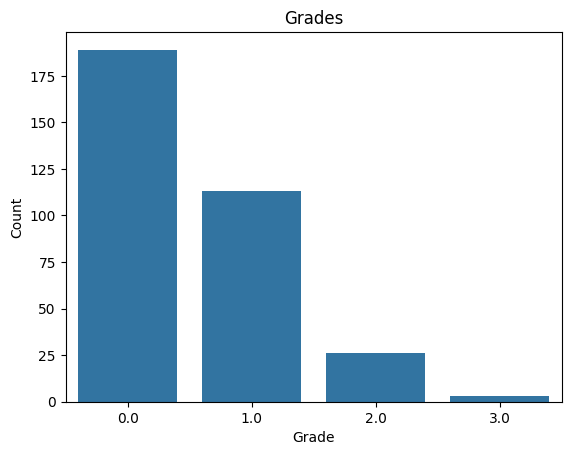

In [4]:
print(Counter(y))
ax = sns.countplot(x="Grade", data = df)
plt.title('Grades')
plt.ylabel('Count')
plt.show()

In [5]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

In [6]:
oversample = SMOTE(k_neighbors= 2)
X, y = oversample.fit_resample(X, y)

In [7]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
import datetime


#df_norm_new=dados
#Train data


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int (x) for x in np.linspace(start = 0, stop = 10, num = 10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int (x) for x in np.linspace(start = 0, stop = 10, num = 10)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
oob_score = [True, False]
random_state = [int (x) for x in np.linspace(start = 0, stop = 111, num = 5)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'oob_score': oob_score,
               'random_state': random_state}



# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestClassifier(random_state=0,criterion='gini')

#rf = RandomForestRegressor(random_state=0)

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 10, cv = 5, verbose = 2,
                               random_state = 0 , n_jobs = -1, scoring = 'accuracy')

# Fit the random search model
fit = rf_random.fit(X, y)
desempenho_cross_val = cross_val_score(rf_random, X, y, scoring = 'accuracy', cv = 10)
print('Desempenho médio: {}'.format(round(100*desempenho_cross_val.mean(),2)) + ' ± '+ '{}'.format(round(100*desempenho_cross_val.std(),2)))

for i,j in zip(rf_random.best_params_.keys(),rf_random.best_params_.values()):
  print(f'{i} = {j},')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Desempenho médio: 96.04 ± 3.22
random_state = 111,
oob_score = False,
n_estimators = 1550,
min_samples_split = 8,
min_samples_leaf = 1,
max_features = sqrt,
max_depth = 80,
bootstrap = False,


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Desempenho médio: 87.5 ± 16.77
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        21
         1.0       0.87      1.00      0.93        13
         2.0       1.00      0.33      0.50         3
         3.0       0.00      0.00      0.00         1

    accuracy                           0.92        38
   macro avg       0.71      0.58

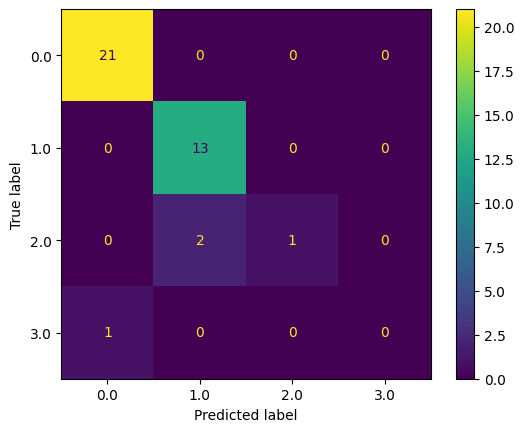

In [8]:
dft = pd.read_csv(r'C:\Users\marco\OneDrive - usp.br\Área de Trabalho\Mestrado/Resultados/R_teste.csv', engine='python',sep=';')
Xt = dft.drop('Grade', axis =1)
yt = dft['Grade']
y_pred2 = fit.predict(Xt)
#print(y_pred)
#print(len(y_pred))
#print(classification_report(y_test, y_pred))
desempenho_cross_val = cross_val_score(rf_random, Xt, yt, scoring = 'accuracy', cv = 10)
print('Desempenho médio: {}'.format(round(100*desempenho_cross_val.mean(),2)) + ' ± '+ '{}'.format(round(100*desempenho_cross_val.std(),2)))
print(classification_report(yt, y_pred2))
ConfusionMatrixDisplay.from_predictions(yt,y_pred2,values_format='.7g')




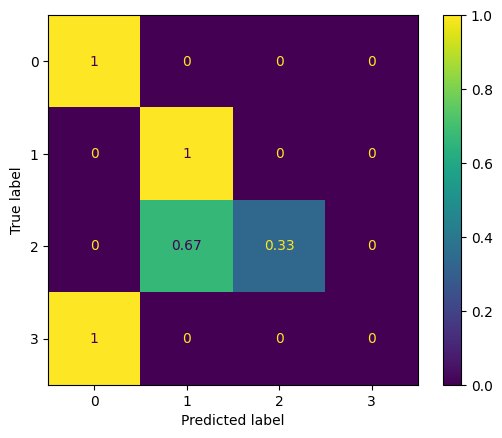

In [9]:
# Confusion matrix
cm = confusion_matrix(yt, y_pred2)
    
    # Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Display the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1,2,3])
disp.plot()
plt.show()

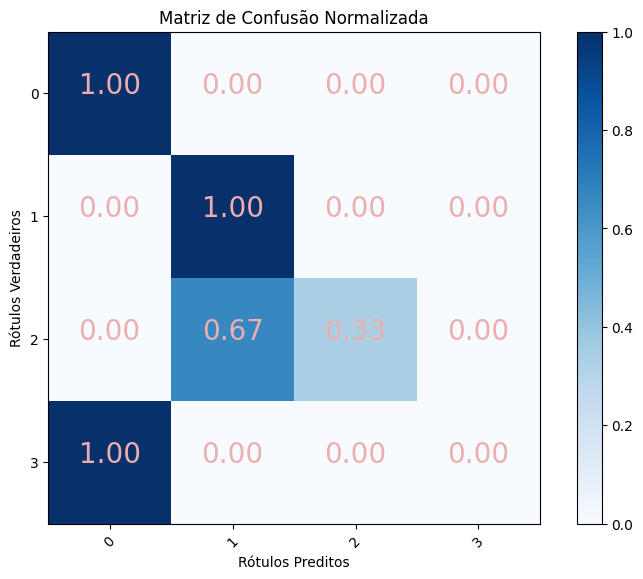

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcular a matriz de confusão
cm = confusion_matrix(yt, y_pred2, normalize='true')

# Criar um heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusão Normalizada')
plt.colorbar()

# Adicionar rótulos aos eixos
class_labels = ['0','1','2','3']  # Substitua pelos seus rótulos
# Configure o tamanho da fonte
plt.rc('font', size=20)  # Defina o tamanho da fonte desejado
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Adicionar os valores nas células
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, f"{cm[i, j]:.2f}", horizontalalignment="center", color="#ECAEAE")

plt.tight_layout()
plt.xlabel('Rótulos Preditos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()